In [38]:
from module_behavioral.dataloader import DataLoader
from module_behavioral.analysis import reduce_dimensions, circle_fitting_and_regression
from module_behavioral.utility import set_significance

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kendalltau

## NORMAL EMOTIONS

In [2]:
## load emotion and color data from experiment one
d = DataLoader(context=1, location='../data/behavioral_data/processeddata/1/')
d.load_color()
d.load_emotion()
d.load_emotion_color_association()

In [3]:
## reduce the similarity matrix to 2 dimensions
color_embedding = reduce_dimensions(d.average_color_matrix, 2)
emotion_embedding = reduce_dimensions(d.average_emotion_matrix, 2)

In [4]:
emotion_center, radius,  emotion_center_distances, color_center_distances, grey_center_distance = circle_fitting_and_regression(emotion_embedding, color_embedding, d.average_emotion_color_ranking_matrix, d.color_values)

In [5]:
## set matplotlib style
plt.style.use('./module_behavioral/figures.style')

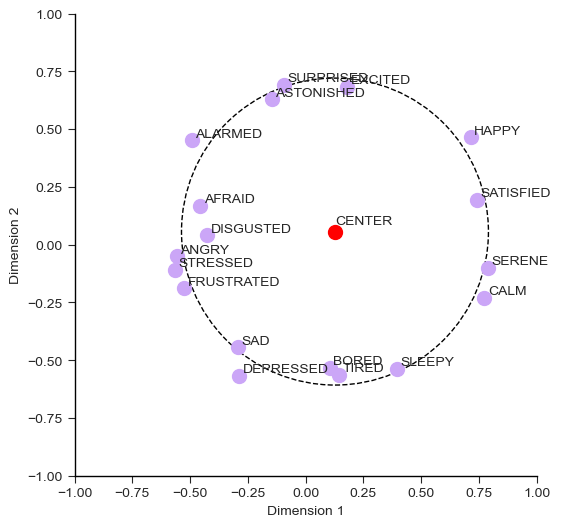

In [8]:
# Fig 3A.

fig,ax = plt.subplots(figsize=(6,6))

circle1 = plt.Circle((emotion_center[0], emotion_center[1]),radius=radius,ls='--',fill=False,edgecolor='black')
plt.gca().add_patch(circle1)

ax.scatter(emotion_embedding[:, 0], emotion_embedding[:, 1])
ax.set_aspect('equal')

for i in range(0, len(d.emotion)):

    x = d.emotion[i]

    plt.annotate(str(x),
                 (emotion_embedding[i, 0], emotion_embedding[i, 1]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
plt.scatter(emotion_center[0], emotion_center[1], color='red')
plt.annotate("CENTER",(emotion_center[0], emotion_center[1]),textcoords="offset points",
                 xytext=(0, 5),
                 ha='left')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.savefig('../figures/3A.svg', dpi=600)

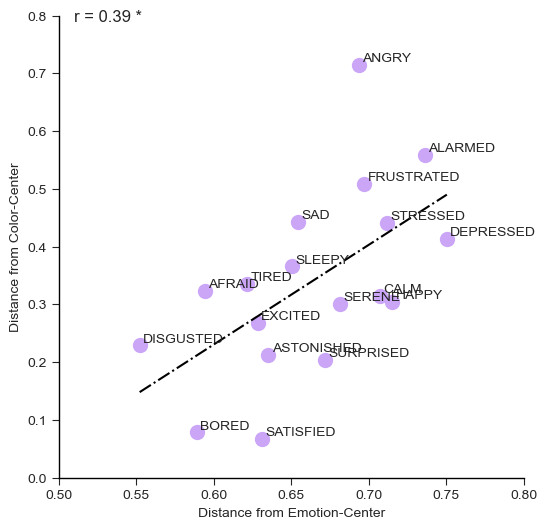

In [39]:
# FIG 3B

# fit a line
coef = np.polyfit(emotion_center_distances, color_center_distances, deg=1)
poly1d_fn = np.poly1d(coef)

# find out the correlation
r,p = kendalltau(emotion_center_distances, color_center_distances)

# plot
fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(emotion_center_distances, color_center_distances)
plotx = np.linspace(np.min(emotion_center_distances),np.max(emotion_center_distances),15)
ax.plot(plotx,poly1d_fn(plotx),'k-.')
for i in range(0, len(d.emotion)):

    x = d.emotion[i]

    plt.annotate(str(x),
                 (emotion_center_distances[i], color_center_distances[i]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
ax.set_xlabel('Distance from Emotion-Center')
ax.set_ylabel('Distance from Color-Center')

ax.text(0.51,0.79,'r = %.2f %s'%(r,set_significance(p)),fontdict={'size':12})
ax.set_xlim([0.5, 0.8])
ax.set_ylim([0, 0.8])

plt.savefig('../figures/3B.svg', dpi=600)


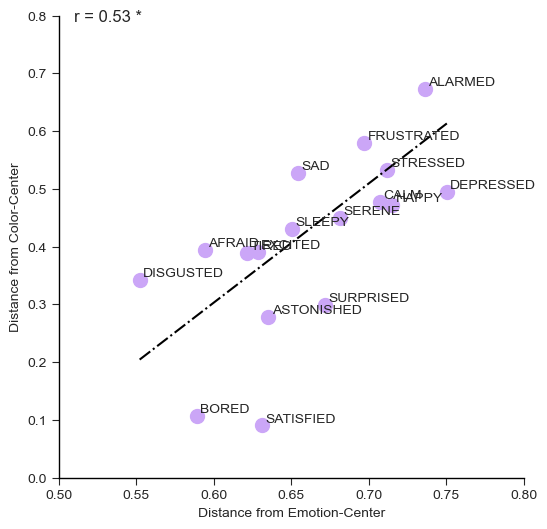

In [40]:
# FIG 3C

# fit a line
coef = np.polyfit(emotion_center_distances, grey_center_distance, deg=1)
poly1d_fn = np.poly1d(coef)

# find out the correlation
r,p = kendalltau(emotion_center_distances, grey_center_distance)

# plot
fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(emotion_center_distances, grey_center_distance)
plotx = np.linspace(np.min(emotion_center_distances),np.max(emotion_center_distances),15)
ax.plot(plotx,poly1d_fn(plotx),'k-.')
for i in range(0, len(d.emotion)):

    x = d.emotion[i]

    plt.annotate(str(x),
                 (emotion_center_distances[i], grey_center_distance[i]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
ax.set_xlabel('Distance from Emotion-Center')
ax.set_ylabel('Distance from Color-Center')

ax.text(0.51,0.79,'r = %.2f %s'%(r,set_significance(p)),fontdict={'size':12})
ax.set_xlim([0.5, 0.8])
ax.set_ylim([0, 0.8])

plt.savefig('../figures/3C.svg', dpi=600)


## SOCIAL EMOTIONS

We do the same analysis, with a new experiment which had extra neutral emotions.

In [49]:
## load emotion and color data from experiment two
d2 = DataLoader(context=2, location='../data/behavioral_data/processeddata/2/')
d2.load_color()
d2.load_emotion()
d2.load_emotion_color_association()

In [50]:
## reduce the similarity matrix to 2 dimensions
color_embedding_neutral = reduce_dimensions(d2.average_color_matrix, 2)
emotion_embedding_neutral = reduce_dimensions(d2.average_emotion_matrix, 2)

In [51]:
emotion_center_neutral, radius_neutral, emotion_center_distances_neutral, color_center_distances_neutral, grey_center_distance_neutral = circle_fitting_and_regression(
    emotion_embedding_neutral, color_embedding_neutral, d2.average_emotion_color_ranking_matrix, d2.color_values)

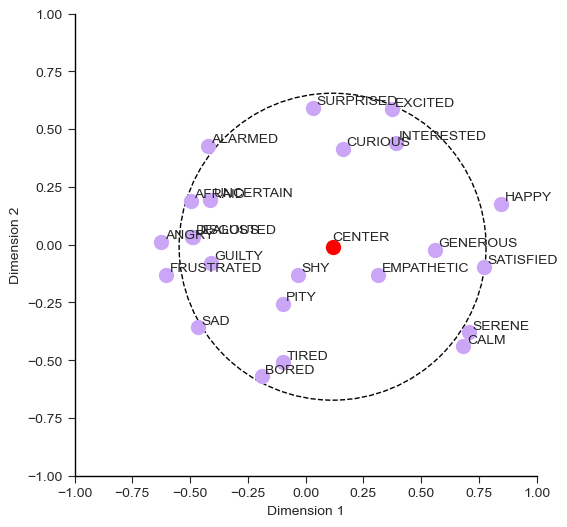

In [52]:
# Fig 3D.

fig,ax = plt.subplots(figsize=(6,6))

circle1 = plt.Circle((emotion_center_neutral[0], emotion_center_neutral[1]),radius=radius,ls='--',fill=False,edgecolor='black')
plt.gca().add_patch(circle1)

ax.scatter(emotion_embedding_neutral[:, 0], emotion_embedding_neutral[:, 1])
ax.set_aspect('equal')

for i in range(0, len(d2.emotion)):

    x = d2.emotion[i]

    plt.annotate(str(x),
                 (emotion_embedding_neutral[i, 0], emotion_embedding_neutral[i, 1]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
plt.scatter(emotion_center_neutral[0], emotion_center_neutral[1], color='red')
plt.annotate("CENTER",(emotion_center_neutral[0], emotion_center_neutral[1]),textcoords="offset points",
                 xytext=(0, 5),
                 ha='left')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.savefig('../figures/3D.svg', dpi=600)

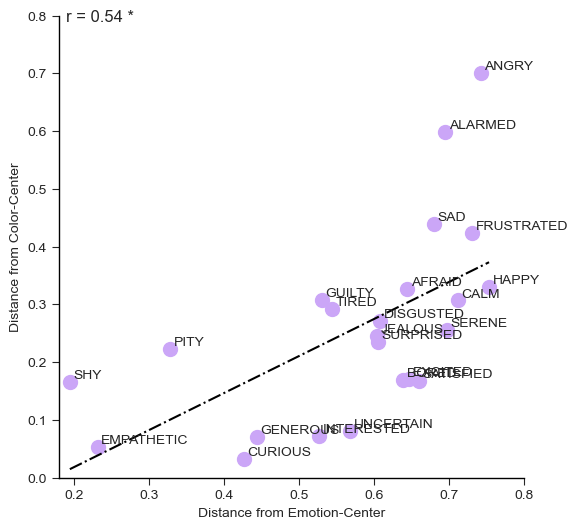

In [60]:
# FIG 3E

# fit a line
coef = np.polyfit(emotion_center_distances_neutral, color_center_distances_neutral, deg=1)
poly1d_fn = np.poly1d(coef)

# find out the correlation
r,p = kendalltau(emotion_center_distances_neutral, color_center_distances_neutral)

# plot
fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(emotion_center_distances_neutral, color_center_distances_neutral)
plotx = np.linspace(np.min(emotion_center_distances_neutral),np.max(emotion_center_distances_neutral),15)
ax.plot(plotx,poly1d_fn(plotx),'k-.')
for i in range(0, len(d2.emotion)):

    x = d2.emotion[i]

    plt.annotate(str(x),
                 (emotion_center_distances_neutral[i], color_center_distances_neutral[i]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
ax.set_xlabel('Distance from Emotion-Center')
ax.set_ylabel('Distance from Color-Center')

ax.text(0.19,0.79,'r = %.2f %s'%(r,set_significance(p)),fontdict={'size':12})
ax.set_xlim([0.18, 0.8])
ax.set_ylim([0, 0.8])

plt.savefig('../figures/3E.svg', dpi=600)


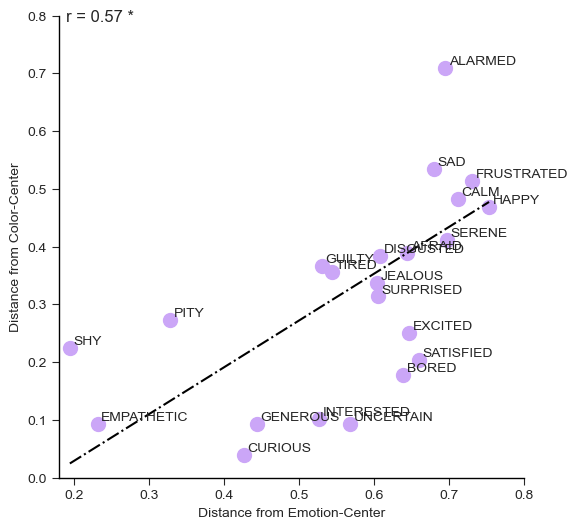

In [61]:
# FIG 3F

# fit a line
coef = np.polyfit(emotion_center_distances_neutral, grey_center_distance_neutral, deg=1)
poly1d_fn = np.poly1d(coef)

# find out the correlation
r,p = kendalltau(emotion_center_distances_neutral, grey_center_distance_neutral)

# plot
fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(emotion_center_distances_neutral, grey_center_distance_neutral)
plotx = np.linspace(np.min(emotion_center_distances_neutral),np.max(emotion_center_distances_neutral),15)
ax.plot(plotx,poly1d_fn(plotx),'k-.')
for i in range(0, len(d2.emotion)):

    x = d2.emotion[i]

    plt.annotate(str(x),
                 (emotion_center_distances_neutral[i], grey_center_distance_neutral[i]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
ax.set_xlabel('Distance from Emotion-Center')
ax.set_ylabel('Distance from Color-Center')

ax.text(0.19,0.79,'r = %.2f %s'%(r,set_significance(p)),fontdict={'size':12})
ax.set_xlim([0.18, 0.8])
ax.set_ylim([0, 0.8])

plt.savefig('../figures/3F.svg', dpi=600)
